# Predict Laptop Prices Considering Thier Characteristics And Specs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=100
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('csv_files/laptop_price (1).csv',encoding= 'ISO-8859-1')

In [3]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
df.isna().sum().sum()

0

# Data Cleaning 

In [5]:
df=df.drop(columns='laptop_ID')

In [6]:
df=df.drop(columns='Product')

In [7]:
#screen resolution

width=df['ScreenResolution'].apply(lambda x:x.split('x')[0].split(' ')[-1]).astype(float)
height=df['ScreenResolution'].apply(lambda x:x.split('x')[-1].split(' ')[0]).astype(float)

df['ScreenResolution']=width*height

In [8]:
# CPU

GHz=df['Cpu'].apply(lambda x:x.split('GHz')[0].split(' ')[-1]).astype(float)

df.insert(6,'GHz',GHz)
df=df.drop(columns='Cpu')

In [9]:
# Ram

df['Ram']=df['Ram'].str.replace('GB','').astype(int)

In [10]:
# GPU

gtx=df['Gpu'].apply(lambda x: 1 if 'geforce' in str(x).lower() and  'gtx' in str(x).lower() else 0)
df.insert(list(df.columns).index('Gpu')+1,'GTX',gtx)

df=df.drop(columns='Gpu')

In [11]:
# Op system is dependent on brand. We can remove this column

print(df['OpSys'].unique())
df=df.drop(columns='OpSys')

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [12]:
#weight
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [13]:
#memory

ssd=df['Memory'].apply(lambda x:x.split('SSD')[0].split('Flash')[0] if 'SSD' in str(x) or 'Flash' in str(x) else x)
ssd=ssd.apply(lambda x:x.replace('GB','') if 'GB' in str(x) else x.replace('TB','') if 'TB' in str(x) else x)
ssd=ssd.apply(pd.to_numeric,errors='coerce')
ssd=ssd.apply(lambda x:x if x>10 else x*1024)
df['SSD']=ssd.fillna(0)


hdd=df['Memory'].apply(lambda x:x.split('HDD')[0].split('Hybrid')[0] if ('HDD' in str(x) and '+' not in str(x)) or ('Hybrid' in str(x) and '+' not in str(x))else
                   x.split('+')[-1].split('HDD')[0].split('Hybrid')[0] if '+' in str(x) else x)
hdd=hdd.apply(lambda x:x.replace('GB','') if 'GB' in str(x) else x.replace('TB','') if 'TB' in str(x) else x)
hdd=hdd.apply(pd.to_numeric,errors='coerce')
hdd=hdd.apply(lambda x:x if x>10 else x*1024)
df['HDD']=hdd.fillna(0)

df=df.drop(columns='Memory')

In [14]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,GHz,GTX,Weight,Price_in_euros,SSD,HDD
0,Apple,Ultrabook,13.3,4096000.0,8,2.3,0,1.37,1339.69,128.0,0.0
1,Apple,Ultrabook,13.3,1296000.0,8,1.8,0,1.34,898.94,128.0,0.0
2,HP,Notebook,15.6,2073600.0,8,2.5,0,1.86,575.00,256.0,0.0
3,Apple,Ultrabook,15.4,5184000.0,16,2.7,0,1.83,2537.45,512.0,0.0
4,Apple,Ultrabook,13.3,4096000.0,8,3.1,0,1.37,1803.60,256.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,2073600.0,4,2.5,0,1.80,638.00,128.0,0.0
1299,Lenovo,2 in 1 Convertible,13.3,5760000.0,16,2.5,0,1.30,1499.00,512.0,0.0
1300,Lenovo,Notebook,14.0,1049088.0,2,1.6,0,1.50,229.00,64.0,0.0
1301,HP,Notebook,15.6,1049088.0,6,2.5,0,2.19,764.00,0.0,1024.0


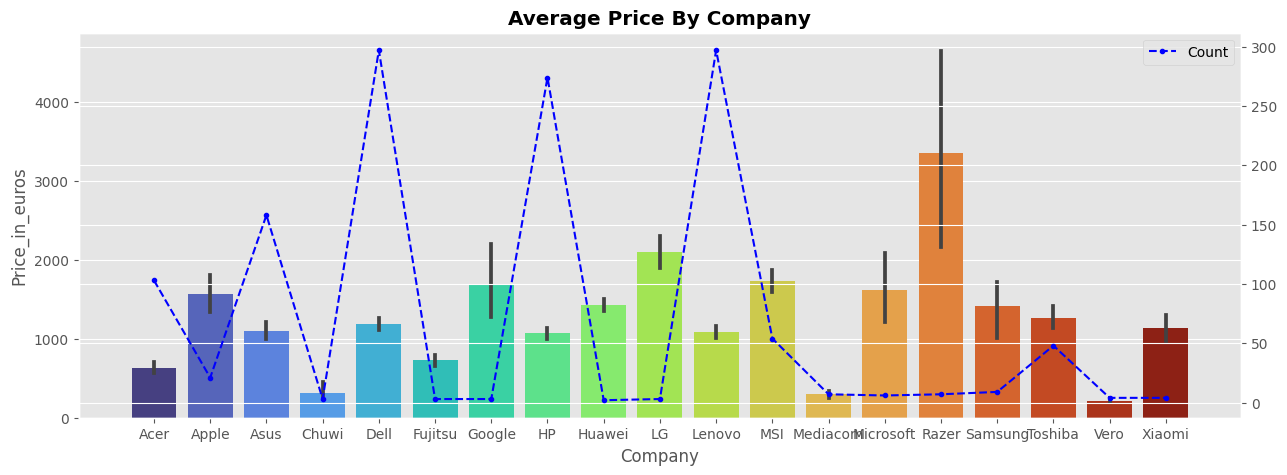

In [15]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(df.sort_values('Company'),x='Company',y='Price_in_euros',palette='turbo',ax=ax)
df['Company'].value_counts().sort_index().plot.line(ax=ax.twinx(),marker='.',ls='--',color='blue',label='Count')
plt.legend()
plt.title('Average Price By Company',fontweight='bold')
plt.show()

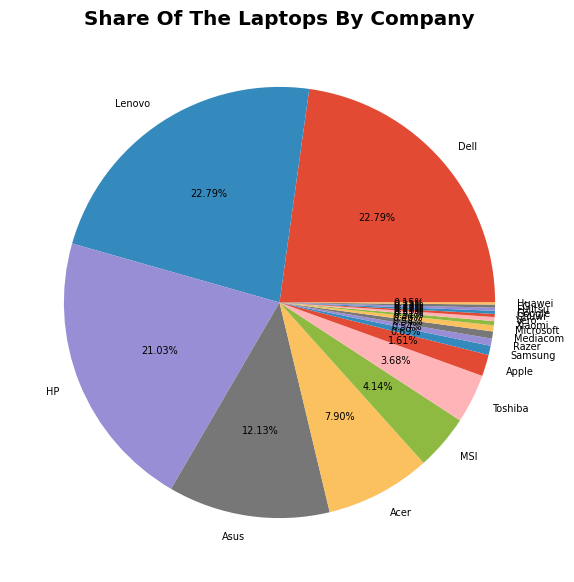

In [16]:
df['Company'].value_counts()\
.plot.pie(label='',figsize=(7,7),fontsize=7,autopct='%.2f%%')
plt.title('Share Of The Laptops By Company',fontweight='bold')
plt.show()

In [17]:
# there are rare labels in the dataset. For these rare labels, price vary greatly.  

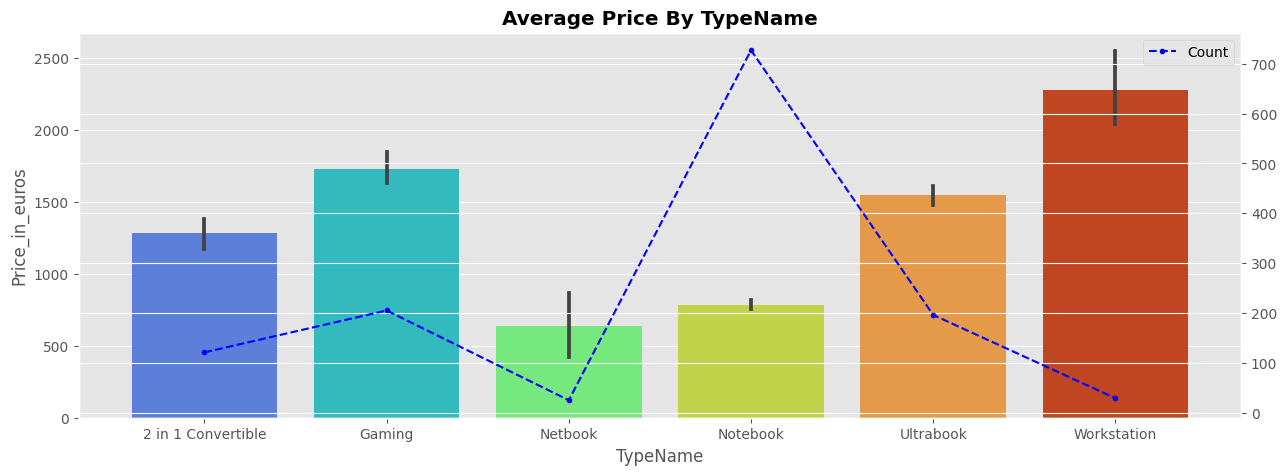

In [18]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(df.sort_values('TypeName'),x='TypeName',y='Price_in_euros',palette='turbo',ax=ax)
df['TypeName'].value_counts().sort_index().plot.line(ax=ax.twinx(),marker='.',ls='--',color='blue',label='Count')
plt.legend()
plt.title('Average Price By TypeName',fontweight='bold')
plt.show()

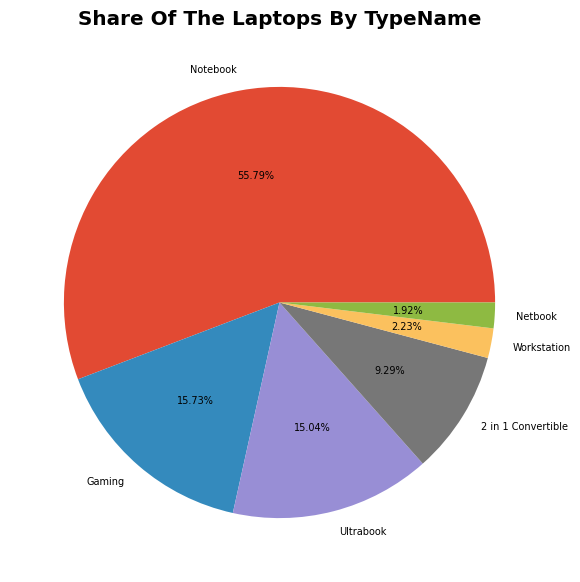

In [19]:
df['TypeName'].value_counts()\
.plot.pie(label='',figsize=(7,7),fontsize=7,autopct='%.2f%%')
plt.title('Share Of The Laptops By TypeName',fontweight='bold')
plt.show()

# Building ML Model 

for random_seed in range(1,1001):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=df['TypeName'],random_state=random_seed)
    X_train_new=get_dummies(X_train)
    X_test_new=get_dummies(X_test)
    
    if X_train_new.shape[1]==X_test_new.shape[1]:
        print(random_seed)

In [20]:
X=df.drop(columns='Price_in_euros')
y=df['Price_in_euros']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=df['TypeName'],random_state=912) #random state, for which test and train sets width are equal

In [21]:
for col in X_train.select_dtypes('O').columns:
    dummies=pd.get_dummies(X_train[col],prefix=col,dummy_na=False)
    X_train=X_train.drop(columns=col)
    X_train=pd.concat([X_train,dummies],axis=1)
    
for col in X_test.select_dtypes('O').columns:
    dummies=pd.get_dummies(X_test[col],prefix=col,dummy_na=False)
    X_test=X_test.drop(columns=col)
    X_test=pd.concat([X_test,dummies],axis=1)  

In [22]:
X_test.shape,X_train.shape

((261, 33), (1042, 33))

In [23]:
from xgboost import XGBRegressor
model=XGBRegressor()#n_estimators=1000,learning_rate=0.05,max_depth=4

from sklearn import metrics

In [24]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [26]:
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.median_absolute_error(train_prediction,y_train)
mae_test=metrics.median_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
print('R2, MAE ,RMSE for train and test data are:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2, MAE ,RMSE for train and test data are:
0.9871404923097643 0.8499108792711011
30.676589965820312 124.63830078125
77.58359475723158 252.75853610276522


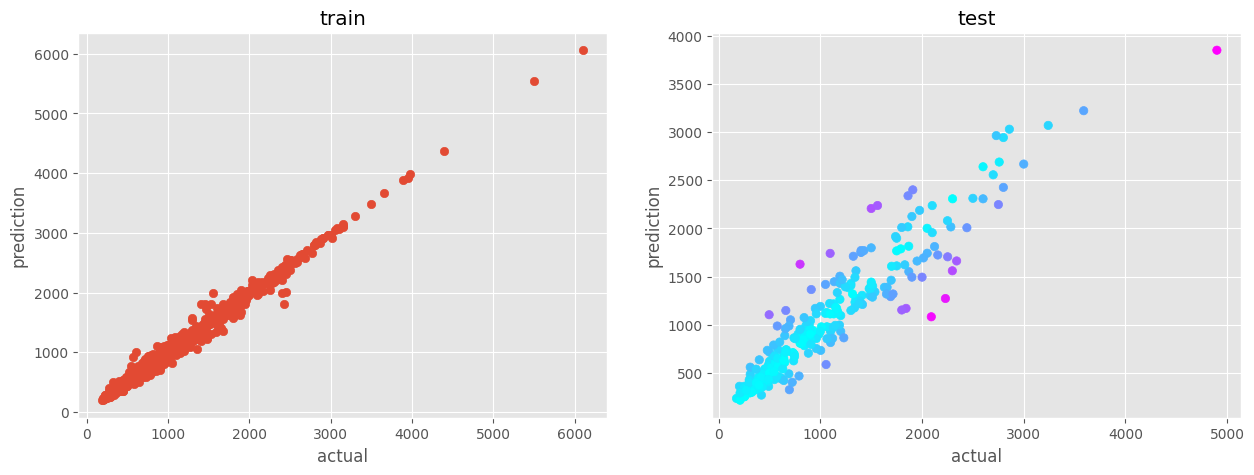

In [27]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('actual')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(y_test,test_prediction,c=(y_test-test_prediction).abs(),cmap='cool')
ax2.set_xlabel('actual')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

# Error Analysis

In [28]:
test=X_test
test['Actual']=y_test
test['Prediction']=test_prediction
test=test.merge(df[['Company','TypeName']],left_index=True,right_index=True)

test['Error']=(test['Prediction']-test['Actual']).abs()

In [29]:
test=test[test.columns[test.columns.str.contains('Company_')==False]]
test=test[test.columns[test.columns.str.contains('TypeName')==False]]

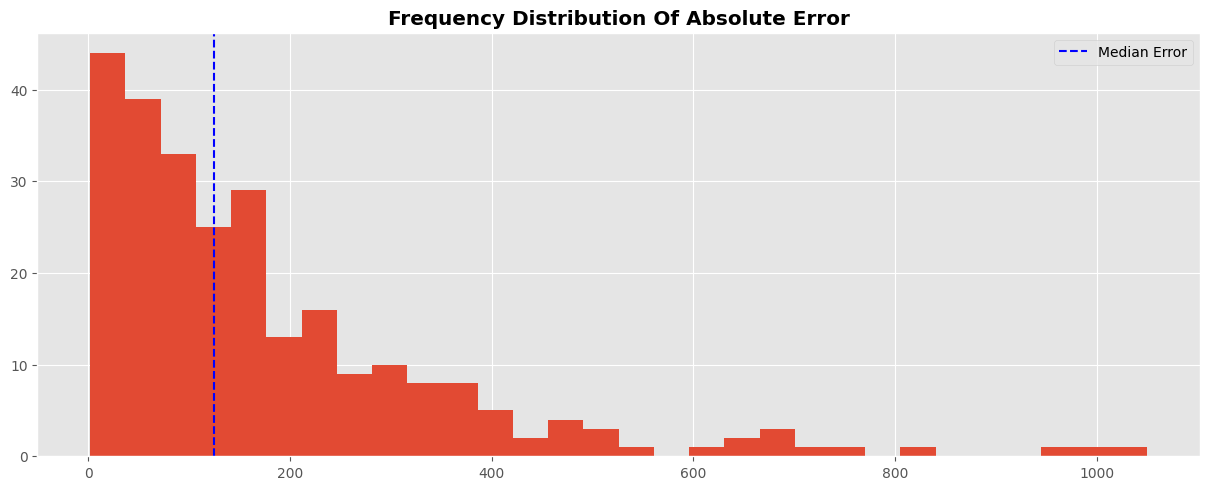

In [30]:
median_error=test['Error'].median()

fig,ax=plt.subplots(figsize=(15,5.5))
test['Error'].hist(ax=ax,bins=30)
ax.axvline(median_error,label='Median Error',color='blue',ls='--')
plt.title('Frequency Distribution Of Absolute Error',fontweight='bold')
plt.legend()
plt.show()

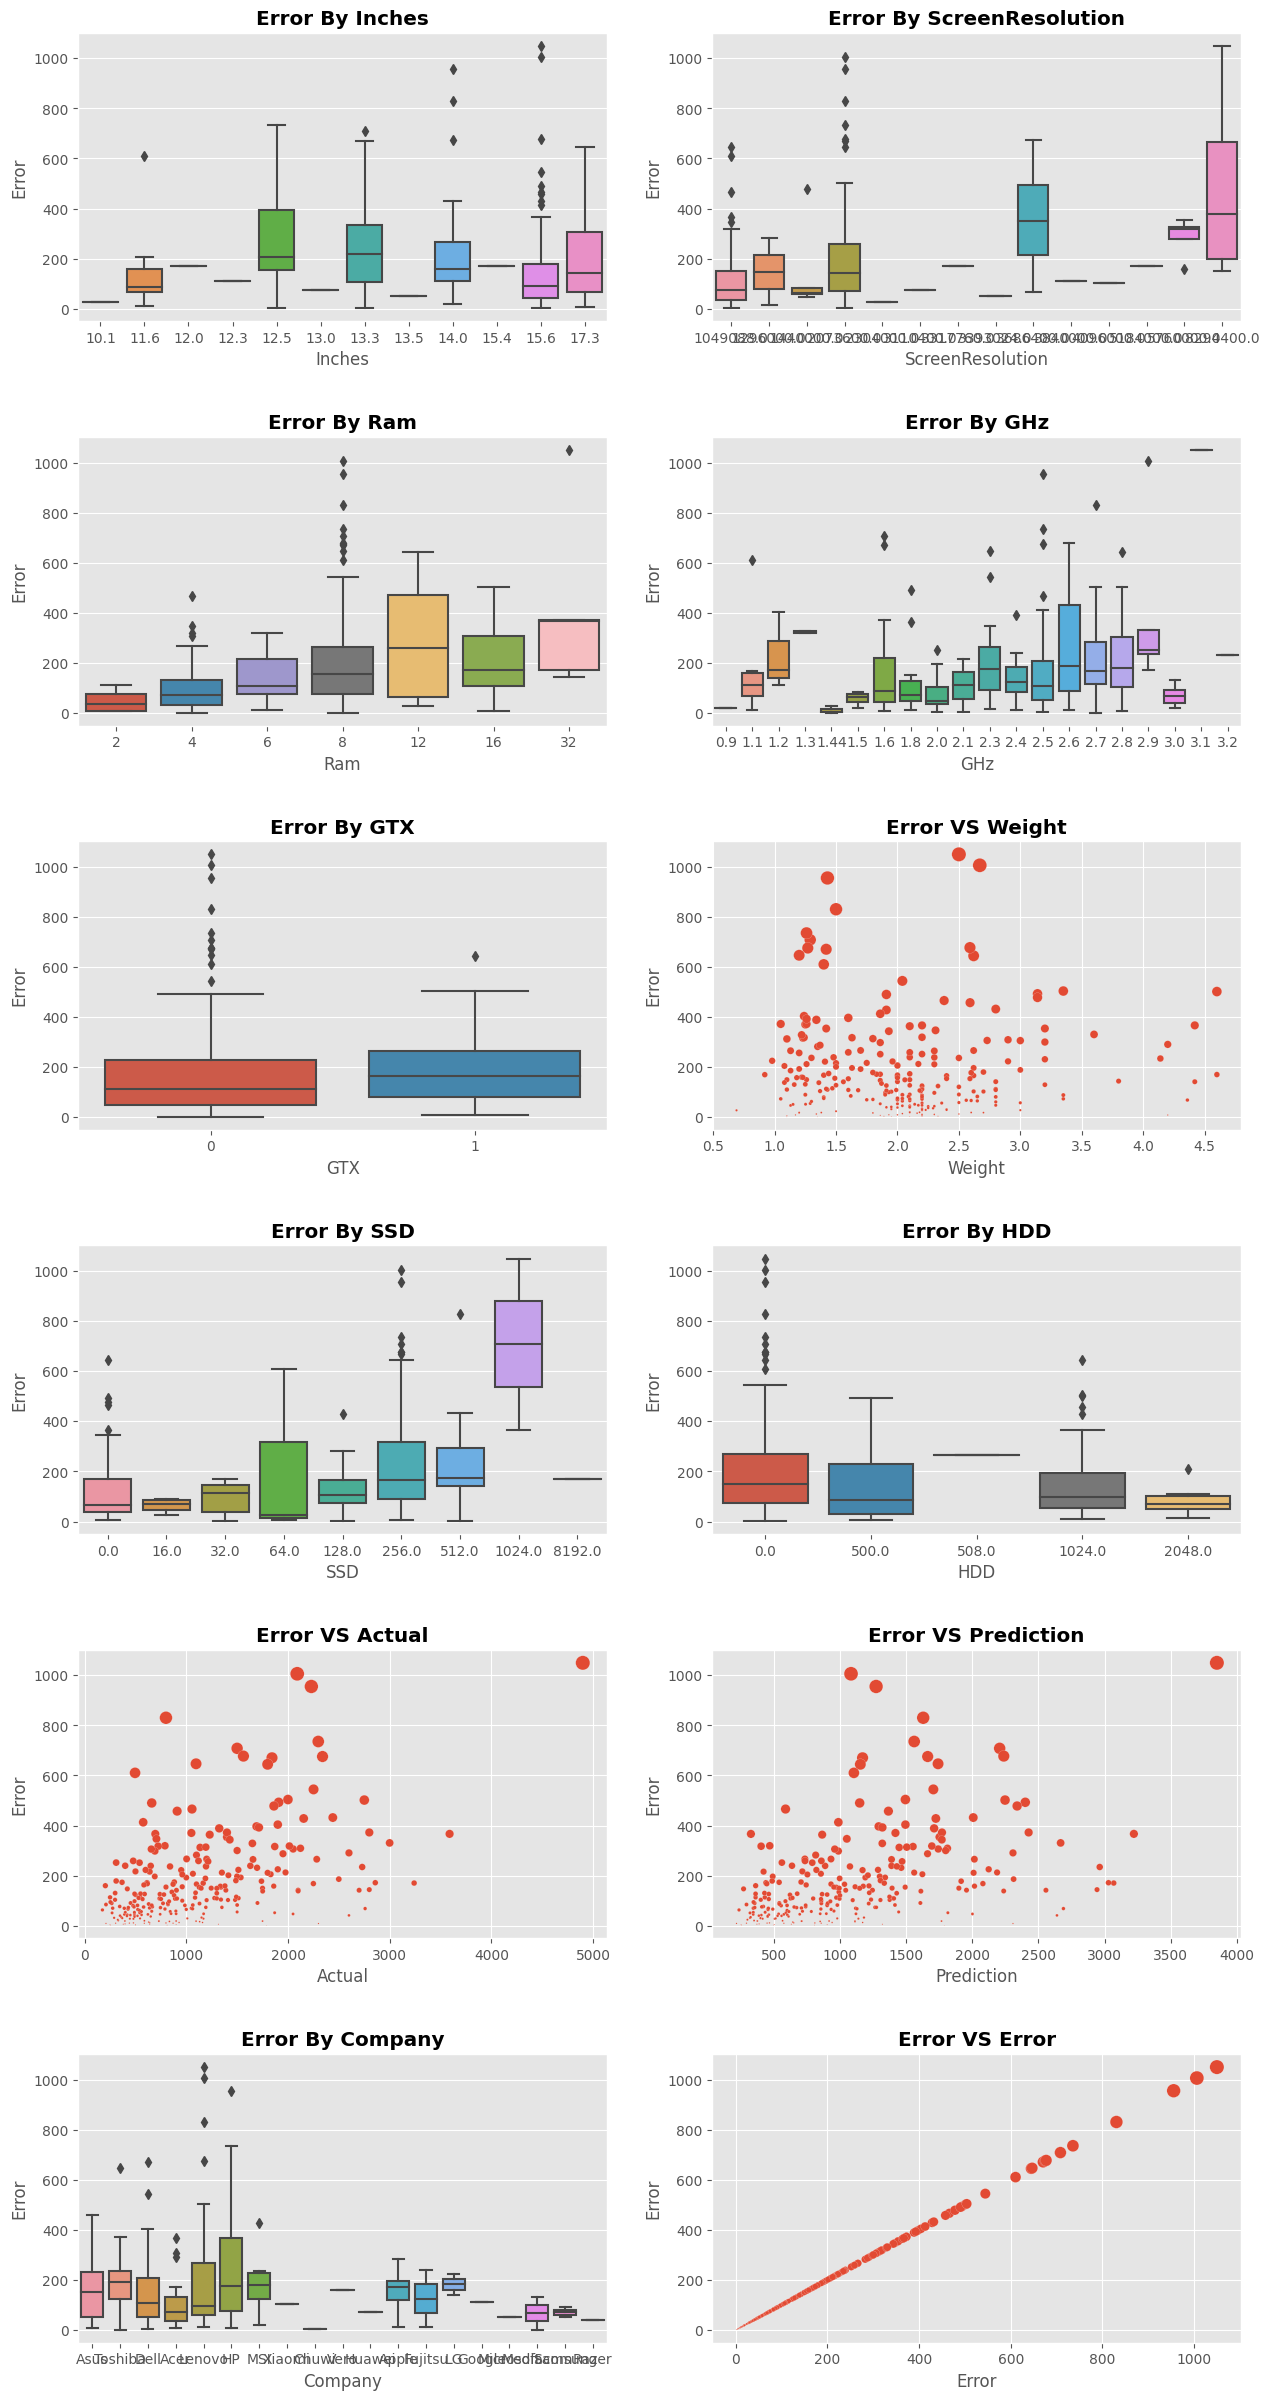

In [31]:
fig,axes=plt.subplots(6,2,figsize=(15,30))

for col,ax in zip(test.columns,axes.ravel()):
    if test[col].nunique()<=20:
        sns.boxplot(test,x=col,y='Error',ax=ax)
        ax.set_title(f'Error By {col}',fontweight='bold')
    else:
        sns.scatterplot(test,x=col,y='Error',s=[i/10 for i in test['Error']],ax=ax)
        ax.set_title(f'Error VS {col}',fontweight='bold')
plt.subplots_adjust(hspace=0.4)
plt.show()